# Preise forward fill

<Axes: xlabel='datetime_utc'>

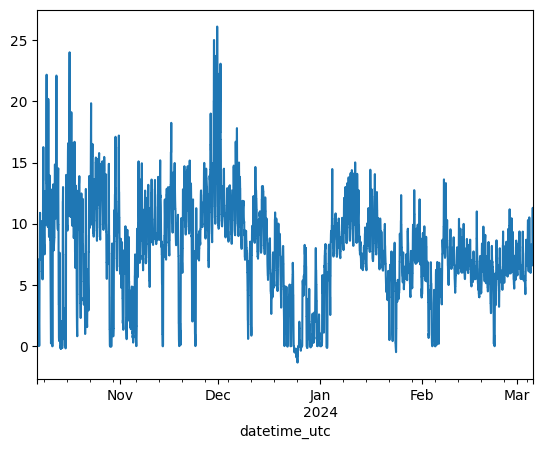

In [12]:
import pandas as pd

df = pd.read_csv('../datasets/first_tier_prices_actual.csv')
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df.set_index('datetime_utc', inplace=True)

df_preise_viertelstuendlich = df['energy_costs_ct_per_kWh'].resample('15T').mean().ffill()
df_preise_viertelstuendlich.plot()

# Strategie: 

In [ ]:
import pandas as pd

df_org = pd.read_csv('datasets/first_tier_data_set.csv')
df_org['start_time'] = pd.to_datetime(df_org['start_time'])
df_org['end_time'] = pd.to_datetime(df_org['end_time'])


start_time = df_org.start_time.min().floor('15min')
end_time = df_org.end_time.max().floor('15min')

index = pd.date_range(start=start_time, end=end_time, freq='15T')

df = pd.DataFrame(index=index, columns=['device_1', 'device_2', 'device_3', 'device_4', 'device_5', 'device_6', 'device_7'])
df[:] = False




for i, row in df_org.iterrows():
    start = row['start_time'].round('15min')
    end = row['end_time'].round('15min')
    device_id = row['device_id']

    df.loc[start:end, f"device_{device_id}"] = True

pd.set_option('display.max_rows', 100)
df.head(100)
df.to_csv('plugged_in_15_min.csv')